<a href="https://colab.research.google.com/github/Tanned-podcast/PublicRemoteRepository/blob/main/PytorchTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

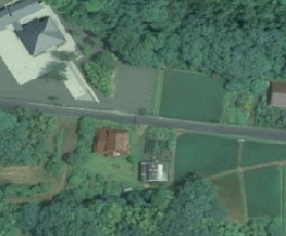

torch.Size([3, 236, 286])


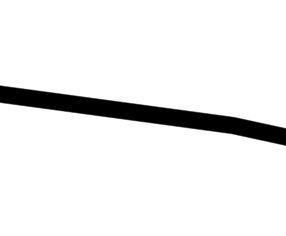

torch.Size([3, 236, 286])
0.0


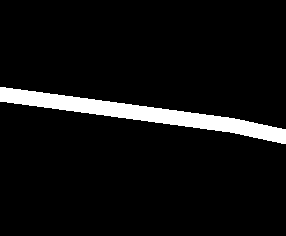

torch.Size([1, 236, 286])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.

In [ ]:
import torch
import torchvision.transforms.functional as TF
import cv2
from google.colab.patches import cv2_imshow

data='/content/drive/MyDrive/QGIS加工済/被害なし/n1.png'
data2='/content/drive/MyDrive/QGIS加工済/被害なし白黒/n1.png'


# 画像読込
img1 = cv2.imread(data)
cv2_imshow(img1)
img1_array=TF.to_tensor(img1)
print(img1_array.shape)

# 画像読込
img = cv2.imread(data2)
cv2_imshow(img)
img_array=TF.to_tensor(img)
print(img_array.shape)

# グレースケールに変換
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 2値化
ret,img2 = cv2.threshold(img,              # 入力画像（グレースケール画像を指定すること）
                           0,                # 閾値
                           255,              # 閾値を超えた画素に割り当てる値
                           cv2.THRESH_BINARY_INV   # 閾値処理方法
                          )
# 閾値確認
print(ret)

# 2値化後の画像表示
cv2_imshow(img2)
img2_array=TF.to_tensor(img2)
print(img2_array.shape)
print(img2_array[0][124])


cat_img = torch.cat((img1_array, img2_array), dim=0)#データの行列のチャンネル数を増やす
print(cat_img.shape)

In [ ]:
import torchvision.models as models
import torch.nn as nn
from torchsummary import summary

Channels=4

Classes=['被害なし', '崩土', '路肩崩壊']
ClassNum=len(Classes)

resnet50 = models.resnet50(pretrained=True)
#modify first layer so it expects 4 input channels; all other parameters unchanged
resnet50.conv1 = torch.nn.Conv2d(Channels,64,kernel_size = (7,7),stride = (2,2), padding = (3,3), bias = False)
#modifying final layer
resnet50.fc = nn.Linear(2048,ClassNum)

summary(resnet50, (4, 224, 224))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 91.5MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]          12,544
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [1]:
import glob
import os
import numpy as np
import torch
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchvision.transforms import v2
import torchvision.models as models
import torch.nn as nn
import cv2
from torch.utils.data import Dataset
from pathlib import Path
from typing import List, Tuple
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

#device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

Channels=4
batch_size=32
epochs=12
IMG_SIZE=224
valsplit=0.25

Classes = ["崩土",  "被害なし", "路肩崩壊", "陥没"]
ClassNum = len(Classes)

trainpath="/content/drive/MyDrive/QGIS加工済/訓練"
savepath="/content/drive/MyDrive/航空写真AI各エポック保存モデル/"
historypath="/content/drive/MyDrive/航空写真AI結果/QGIS加工済裏どりのみ"

'''
PytorchではDataloaderという,膨大なデータセットからでもメモリを圧迫せずに取り出せてforループにも対応するための枠組みがある
データセットをDataloaderが引っ張ってこれるような形式にするためにMyDataset(torch.utils.data.Dataset)というクラスを作れば，
あとはそのメソッドをtorch.utils.data.Datasetが勝手に使用してデータを加工してくれる
__init__, __getitem__, __len__をクラス内で必ず定義しなければならない
Dataloader内のデータはバッチごとにまとめられる
'''
class MyDataset(Dataset):
    def __init__(self, root: str, transforms, Classes) -> None:
        super().__init__()
        self.transforms = transforms
        self.Classes = Classes
        #globは複数のファイルのパスをまとめて取得する
        #訓練と訓練白黒の二個下のディレクトリから画像を取得
        self.data = list(sorted(Path(root).glob("*/*")))
        self.data2 = list(sorted(Path(root+"白黒").glob("*/*")))
        print(self.data)
        print(self.data2)



    # ここで取り出すデータを指定している
    def __getitem__(
            self,
            index: int
    ) -> Tuple[torch.Tensor, torch.Tensor]:

        data = self.data[index]
        data2 = self.data2[index]

        img1 = cv2.imread(str(data))
        img1 = cv2.resize(img1, (IMG_SIZE, IMG_SIZE))
        img2_tmp = cv2.imread(str(data2))

        # グレースケールに変換
        img2_tmp = cv2.cvtColor(img2_tmp,cv2.COLOR_BGR2GRAY)
        # 2値化
        ret,img2 = cv2.threshold(img2_tmp, 0, 255, cv2.THRESH_BINARY_INV)
        img2 = cv2.resize(img2, (IMG_SIZE, IMG_SIZE))

        #img1のテンソルとimg2のテンソルをチャンネル方向(dim0)に結合
        cat_img = torch.cat((TF.to_tensor(img1), TF.to_tensor(img2)), dim=0)

        # データの変形 (transforms)
        transformed_img = self.transforms(cat_img)

        #ラベル貼り：dataというパスを/で区切ってリストにし，クラス名のところをラベルに格納
        #クラス名は文字列なので，self.Classesの要素と比較して一致するところの番号をラベルとする
        label = str(data).split("/")[-2]
        label = torch.tensor(self.Classes.index(label))

        return transformed_img, label

    # この method がないと DataLoader を呼び出す際にエラーを吐かれる
    def __len__(self) -> int:
        return len(self.data)


#入力データに施す処理
transforms = v2.Compose([
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0,0,0,0], std=[0.2, 0.2, 0.2, 0.2]),
])


trainvalset = MyDataset(root=trainpath, transforms=transforms, Classes=Classes)
trainset, valset = random_split(trainvalset, [1-valsplit, valsplit])

trainloader = DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True)
valloader = DataLoader(dataset=valset,batch_size=batch_size,shuffle=True)


resnet50 = models.resnet50(weights=True)

#modify first layer so it expects 4 input channels; all other parameters unchanged
resnet50.conv1 = torch.nn.Conv2d(Channels,64,kernel_size = (7,7),stride = (2,2), padding = (3,3), bias = False)
#modifying final layer
resnet50.fc = nn.Linear(2048,ClassNum)

#GPUにニューラルネットワークを渡す
#resnet50=resnet50.to(device)

#lossfunction&optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)

'''
trainiterator
enumerateはtrainloader内のすべてのdataに対してループし，繰り返し回数をbatchに渡すという意味
Dataloader内ではバッチごとにデータがまとめられるので1回の取り出しで1バッチ分のデータを丸々取り出せる
'''
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

def train(trainloader, valloader, model, loss_fn, optimizer, epochs):
    size = len(trainloader.dataset)
    num_batches = len(trainloader)
    size_val = len(valloader.dataset)
    num_batches_val = len(valloader)
    for epoch in range(epochs):
        running_loss, running_correct = 0, 0
        val_loss, val_correct = 0, 0
        for batch, (X, y) in enumerate(trainloader):
            #X=X.to(device)
            #y=y.to(device)
            # Compute prediction and loss
            pred = model(X)
            loss = loss_fn(pred, y)

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            #損失と正解数の合計を計算しておき，後でそのエポック内での平均をとる
            running_loss += loss.item()
            running_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        epoch_loss = running_loss / num_batches
        epoch_acc = running_correct / size

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f'Epoch {epoch + 1} TrainLoss: {epoch_loss:.4f} TrainAcc: {epoch_acc:.4f}')

        # Set the model to evaluation mode - important for batch normalization and dropout layers
        model.eval()
        # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
        # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
        with torch.no_grad():
            for X, y in valloader:
                #X=X.to(device)
                #y=y.to(device)
                pred = model(X)
                val_loss += loss_fn(pred, y).item()
                val_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            val_loss /= num_batches_val
            val_correct /= size_val
        # Set the model to train mode
        model.train()

        val_losses.append(val_loss)
        val_accuracies.append(val_correct)

        print(f'Epoch {epoch + 1} ValLoss: {val_loss:.4f} ValAcc: {val_correct:.4f}')

        #10epoch毎にパラメータを別々のフォルダに保存
        e1=epoch+1
        if (e1 % 10 == 0):
            savepath2 = Path(savepath+str(e1)+"/model_weights.pth")
            print('Saving Model...')
            torch.save(model.state_dict(), savepath2)
            print('Model saved in', savepath2)

        print(' ')

train(trainloader, valloader, resnet50, loss_fn, optimizer, epochs)

#グラフ可視化
#pltの(x,y)のxにあたるepochのリスト　1から開始
ep=np.arange(1, epochs+1)

def plot_acc(train_accuracies, val_accuracies):
    plt.plot(ep, train_accuracies)
    plt.plot(ep, val_accuracies)
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.xticks(np.arange(0, epochs+1, 10))
    plt.yticks(np.arange(0.0, 1.05, 0.05))
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

def plot_loss(train_losses, val_losses):
    plt.plot(ep, train_losses)
    plt.plot(ep, val_losses)
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.xticks(np.arange(0, epochs+1, 10))
    plt.ylim(bottom=-5, top=10)
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_acc(train_accuracies, val_accuracies)
plot_loss(train_losses, val_losses)

'''
# log_dirでlogのディレクトリを指定
writer = SummaryWriter(log_dir=historypath)

# xとyの値を記録していく
for i in range(epochs):
    writer.add_scalar("Train Accuracy", train_accuracies[i], i)
    writer.add_scalar("Validation Accuracy", val_accuracies[i], i)
    writer.add_scalar("Train Loss", train_losses[i], i)
    writer.add_scalar("Validation Loss", val_losses[i], i)

# writerを閉じる
writer.close()
'''

print('Training Finished!!!')

[PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1027 (1).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1027.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1030.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1040 (1).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1040 (2).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1040 (3).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1040.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1041 (2).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1041 (3).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1041.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1047.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1054.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1066 (1).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1066.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1070 (2).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1070 (4).png'), Pos

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 174MB/s]


Epoch 1 TrainLoss: 1.1791 TrainAcc: 0.4553
Epoch 1 ValLoss: 1.0609 ValAcc: 0.5244
 
Epoch 2 TrainLoss: 1.0320 TrainAcc: 0.6463
Epoch 2 ValLoss: 0.9977 ValAcc: 0.5610
 
Epoch 3 TrainLoss: 0.9209 TrainAcc: 0.6423
Epoch 3 ValLoss: 0.9232 ValAcc: 0.6341
 
Epoch 4 TrainLoss: 0.8051 TrainAcc: 0.7033
Epoch 4 ValLoss: 0.8845 ValAcc: 0.6220
 
Epoch 5 TrainLoss: 0.6838 TrainAcc: 0.7439
Epoch 5 ValLoss: 0.8044 ValAcc: 0.7073
 
Epoch 6 TrainLoss: 0.5975 TrainAcc: 0.7927
Epoch 6 ValLoss: 0.8276 ValAcc: 0.6707
 
Epoch 7 TrainLoss: 0.4960 TrainAcc: 0.8211
Epoch 7 ValLoss: 0.6934 ValAcc: 0.7195
 
Epoch 8 TrainLoss: 0.4455 TrainAcc: 0.8659
Epoch 8 ValLoss: 0.8404 ValAcc: 0.6585
 
Epoch 9 TrainLoss: 0.3728 TrainAcc: 0.9024
Epoch 9 ValLoss: 0.8019 ValAcc: 0.6463
 
Epoch 10 TrainLoss: 0.2985 TrainAcc: 0.9146
Epoch 10 ValLoss: 0.6759 ValAcc: 0.7195
Saving Model...


IsADirectoryError: ignored

In [2]:
import glob
import os
import numpy as np
import torch
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchvision.transforms import v2
import torchvision.models as models
import torch.nn as nn
import cv2
from torch.utils.data import Dataset
from pathlib import Path
from typing import List, Tuple
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import confusion_matrix


#device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

Channels=4
IMG_SIZE=224
epochlist=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

Classes = ["崩土",  "被害なし", "路肩崩壊", "陥没"]
ClassNum = len(Classes)

testpath="/content/drive/MyDrive/QGIS加工済/訓練"
savepath="/content/drive/MyDrive/航空写真AI各エポック保存モデル"

'''
PytorchではDataloaderという,膨大なデータセットからでもメモリを圧迫せずに取り出せてforループにも対応するための枠組みがある
データセットをDataloaderが引っ張ってこれるような形式にするためにMyDataset(torch.utils.data.Dataset)というクラスを作れば，
あとはそのメソッドをtorch.utils.data.Datasetが勝手に使用してデータを加工してくれる
__init__, __getitem__, __len__をクラス内で必ず定義しなければならない
Dataloader内のデータはバッチごとにまとめられる
'''
class MyDataset(Dataset):
    def __init__(self, root: str, transforms, Classes) -> None:
        super().__init__()
        self.transforms = transforms
        self.Classes = Classes
        #globは複数のファイルのパスをまとめて取得する
        #訓練と訓練白黒の二個下のディレクトリから画像を取得
        self.data = list(sorted(Path(root).glob("*/*")))
        self.data2 = list(sorted(Path(root+"白黒").glob("*/*")))
        print(self.data)
        print(self.data2)



    # ここで取り出すデータを指定している
    def __getitem__(
            self,
            index: int
    ) -> Tuple[torch.Tensor, torch.Tensor]:

        data = self.data[index]
        data2 = self.data2[index]

        img1 = cv2.imread(str(data))
        img1 = cv2.resize(img1, (IMG_SIZE, IMG_SIZE))
        img2_tmp = cv2.imread(str(data2))

        # グレースケールに変換
        img2_tmp = cv2.cvtColor(img2_tmp,cv2.COLOR_BGR2GRAY)
        # 2値化
        ret,img2 = cv2.threshold(img2_tmp, 0, 255, cv2.THRESH_BINARY_INV)
        img2 = cv2.resize(img2, (IMG_SIZE, IMG_SIZE))

        #img1のテンソルとimg2のテンソルをチャンネル方向(dim0)に結合
        cat_img = torch.cat((TF.to_tensor(img1), TF.to_tensor(img2)), dim=0)

        # データの変形 (transforms)
        transformed_img = self.transforms(cat_img)

        #ラベル貼り：dataというパスを/で区切ってリストにし，クラス名のところをラベルに格納
        #クラス名は文字列なので，self.Classesの要素と比較して一致するところの番号をラベルとする
        label = str(data).split("/")[-2]
        label = torch.tensor(self.Classes.index(label))

        return transformed_img, label

    # この method がないと DataLoader を呼び出す際にエラーを吐かれる
    def __len__(self) -> int:
        return len(self.data)


#入力データに施す処理
transforms = v2.Compose([
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0,0,0,0], std=[0.2, 0.2, 0.2, 0.2]),
])

testset= MyDataset(root=testpath, transforms=transforms, Classes=Classes)

testloader = DataLoader(dataset=testset,batch_size=len(testset),shuffle=True)
print(len(testloader))

resnet50 = models.resnet50()

#modify first layer so it expects 4 input channels; all other parameters unchanged
resnet50.conv1 = torch.nn.Conv2d(Channels,64,kernel_size = (7,7),stride = (2,2), padding = (3,3), bias = False)
#modifying final layer
resnet50.fc = nn.Linear(2048,ClassNum)

#lossfunction&optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)

def evaluate(testloader, model, loss_fn, optimizer):
    size_test = len(testloader.dataset)
    test_loss, test_correct = 0, 0
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    model.eval()
    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in testloader:
            #X=X.to(device)
            #y=y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        test_correct /= size_test

    print(f'TestLoss: {test_loss:.4f} TestAcc: {test_correct:.4f}')
    #テストデータの混同行列を計算し可視化
    #scikitlearnの混同行列はラベルをonehotではなく実際のクラス番号にする必要がある
    #混同行列の見方は行が正解ラベルのクラス列が推定クラス
    print(confusion_matrix(y, pred))
    print(" ")

for e in epochlist:
    #モデル構築
    modelpath=(Path(savepath+str(e)).glob("*"))
    epochmodel = resnet50
    epochmodel.load_state_dict(torch.load(modelpath))
    #GPUにニューラルネットワークを渡す
    #epochmodel=epochmodel.to(device)

    print("Model in Epoch", e)
    #テストデータで評価
    evaluate(testloader, epochmodel, loss_fn, optimizer)

print('Testing Complete!!!')

[PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1027 (1).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1027.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1030.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1040 (1).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1040 (2).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1040 (3).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1040.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1041 (2).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1041 (3).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1041.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1047.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1054.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1066 (1).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1066.png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1070 (2).png'), PosixPath('/content/drive/MyDrive/QGIS加工済/訓練/崩土/1070 (4).png'), Pos

'\nresnet50 = models.resnet50(weights=True)\n\n#modify first layer so it expects 4 input channels; all other parameters unchanged\nresnet50.conv1 = torch.nn.Conv2d(Channels,64,kernel_size = (7,7),stride = (2,2), padding = (3,3), bias = False)\n#modifying final layer\nresnet50.fc = nn.Linear(2048,ClassNum)\n\n#GPUにニューラルネットワークを渡す\n#resnet50=resnet50.to(device)\n\n#lossfunction&optimizer\nloss_fn = nn.CrossEntropyLoss()\noptimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)\n\ndef evaluate(testloader, model, loss_fn, optimizer):\n    size_test = len(testloader.dataset)\n    num_batches_test = len(testloader)\n    test_loss, test_correct = 0, 0\n    # Set the model to evaluation mode - important for batch normalization and dropout layers\n    model.eval()\n    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode\n    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True\n 